In [3]:
# =============================================================================
# CELL 0: PRE-REQUISITES - NEW REAL DATASET
# =============================================================================
from pathlib import Path
import os

# NEW structure: data/Training/ (your folder setup)
PROJECT_ROOT = Path("..").resolve()  # notebooks/ -> brain-tumor-detection/
DATA_ROOT = PROJECT_ROOT / "data"
TRAIN_PATH = DATA_ROOT / "Training"
TEST_PATH = DATA_ROOT / "Testing"

print("📁 NEW REAL DATASET STRUCTURE:")
print(f"data/: {DATA_ROOT.absolute()}")
print(f"✅ Training: {TRAIN_PATH.absolute()}")

if TRAIN_PATH.exists():
    print("\n✅ Training exists. Classes:")
    for cls_folder in TRAIN_PATH.iterdir():
        if cls_folder.is_dir():
            img_count = len(list(cls_folder.glob("*.jpg")))
            print(f"  📂 {cls_folder.name}: {img_count} images")
    total_train = sum(len(list((TRAIN_PATH/cls).glob("*.jpg"))) for cls in TRAIN_PATH.iterdir())
    print(f"\n✅ TOTAL TRAINING: {total_train} labeled MRI images")
else:
    print("❌ data/Training/ MISSING - run git commit first!")

print(f"\n✅ Test path: {TEST_PATH.absolute()}")


📁 NEW REAL DATASET STRUCTURE:
data/: C:\Users\Anvesha Garg\brain-tumor-detection\data
✅ Training: C:\Users\Anvesha Garg\brain-tumor-detection\data\Training

✅ Training exists. Classes:
  📂 glioma: 1400 images
  📂 meningioma: 1400 images
  📂 notumor: 1400 images
  📂 pituitary: 1400 images

✅ TOTAL TRAINING: 5600 labeled MRI images

✅ Test path: C:\Users\Anvesha Garg\brain-tumor-detection\data\Testing


In [4]:
# =============================================================================
# CELL 1: USE REAL KAGGLE DATASET DIRECTLY (NO PROCESSING NEEDED)
# =============================================================================
print("=" * 60)
print("✅ NO DATA PREPARATION NEEDED - Using Kaggle BTNS dataset directly!")
print("=" * 60)

from pathlib import Path
import os

# YOUR REAL DATA (already perfect structure!)
PROJECT_ROOT = Path("..").resolve()  # notebooks/ -> brain-tumor-detection/
DATA_ROOT = PROJECT_ROOT / "data"
TRAIN_PATH = DATA_ROOT / "Training"
TEST_PATH = DATA_ROOT / "Testing"

print(f"📁 Real dataset paths:")
print(f"   Training: {TRAIN_PATH.absolute()}")
print(f"   Testing:  {TEST_PATH.absolute()}")

# VERIFY REAL LABELED STRUCTURE
if TRAIN_PATH.exists():
    print("\n✅ Training classes (REAL MRI labels):")
    classes = []
    total_train = 0
    for cls_folder in TRAIN_PATH.iterdir():
        if cls_folder.is_dir():
            img_count = len(list(cls_folder.glob("*.jpg")))
            print(f"   📂 {cls_folder.name}: {img_count} images")
            classes.append(cls_folder.name)
            total_train += img_count
    
    print(f"\n✅ TOTAL: {total_train} labeled training images")
    print(f"✅ Classes: {classes}")
    
    # Test set
    total_test = sum(len(list((TEST_PATH/cls).glob("*.jpg"))) for cls in TEST_PATH.iterdir())
    print(f"✅ Test images: {total_test}")
    
else:
    print("❌ data/Training/ NOT FOUND!")
    print("Run: git add data/ && git commit -m 'Add real dataset' && git push")

print("\n🎉 REAL LABELED MRI DATA READY - NO SYNTHETIC SPLITTING!")
print("✅ Skip to Cell 2 (DataLoader)")

✅ NO DATA PREPARATION NEEDED - Using Kaggle BTNS dataset directly!
📁 Real dataset paths:
   Training: C:\Users\Anvesha Garg\brain-tumor-detection\data\Training
   Testing:  C:\Users\Anvesha Garg\brain-tumor-detection\data\Testing

✅ Training classes (REAL MRI labels):
   📂 glioma: 1400 images
   📂 meningioma: 1400 images
   📂 notumor: 1400 images
   📂 pituitary: 1400 images

✅ TOTAL: 5600 labeled training images
✅ Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
✅ Test images: 1600

🎉 REAL LABELED MRI DATA READY - NO SYNTHETIC SPLITTING!
✅ Skip to Cell 2 (DataLoader)


In [5]:
# =============================================================================
# CELL 2: REAL KAGGLE DATASET LOADERS (data/ folder)
# =============================================================================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

# YOUR NEW REAL DATA PATHS (from notebooks/)
PROJECT_ROOT = Path("..").resolve()  # notebooks/ -> brain-tumor-detection/
DATA_ROOT = PROJECT_ROOT / "data"    # YOUR data/ folder
TRAIN_PATH = DATA_ROOT / "Training"
TEST_PATH = DATA_ROOT / "Testing"

print(f"✅ Real dataset paths:")
print(f"   Training: {TRAIN_PATH.absolute()}")
print(f"   Testing:  {TEST_PATH.absolute()}")

# Verify folders exist
assert DATA_ROOT.exists(), f"❌ data/ folder missing: {DATA_ROOT}"
assert TRAIN_PATH.exists(), f"❌ data/Training/ missing: {TRAIN_PATH}"
assert TEST_PATH.exists(), f"❌ data/Testing/ missing: {TEST_PATH}"

print("✅ REAL DATA PATHS VERIFIED!")

# ENHANCED Transforms (better for MRI)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# LOAD REAL KAGGLE DATASET (glioma_tumor, meningioma_tumor, etc.)
train_dataset = datasets.ImageFolder(str(TRAIN_PATH), transform=train_transform)
test_dataset = datasets.ImageFolder(str(TEST_PATH), transform=test_transform)

# IMPROVED DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

print(f"\n✅ Training: {len(train_dataset)} REAL labeled MRI images")
print(f"✅ Testing:  {len(test_dataset)} images")
print(f"✅ Classes:  {train_dataset.classes}")
print(f"✅ Batch size: 32 (improved from 16)")
print("✅ READY FOR TRAINING!")


✅ Real dataset paths:
   Training: C:\Users\Anvesha Garg\brain-tumor-detection\data\Training
   Testing:  C:\Users\Anvesha Garg\brain-tumor-detection\data\Testing
✅ REAL DATA PATHS VERIFIED!

✅ Training: 5600 REAL labeled MRI images
✅ Testing:  1600 images
✅ Classes:  ['glioma', 'meningioma', 'notumor', 'pituitary']
✅ Batch size: 32 (improved from 16)
✅ READY FOR TRAINING!


c:\Users\Anvesha Garg\brain-tumor-detection\venv\Lib\site-packages\torch\utils\data\dataloader.py:1118: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)


✅ Batch shape: torch.Size([32, 3, 224, 224])
✅ Sample labels: [1, 2, 0, 3, 3, 3, 0, 0, 1, 0]
✅ Classes in batch: tensor([ 8,  3,  8, 13])


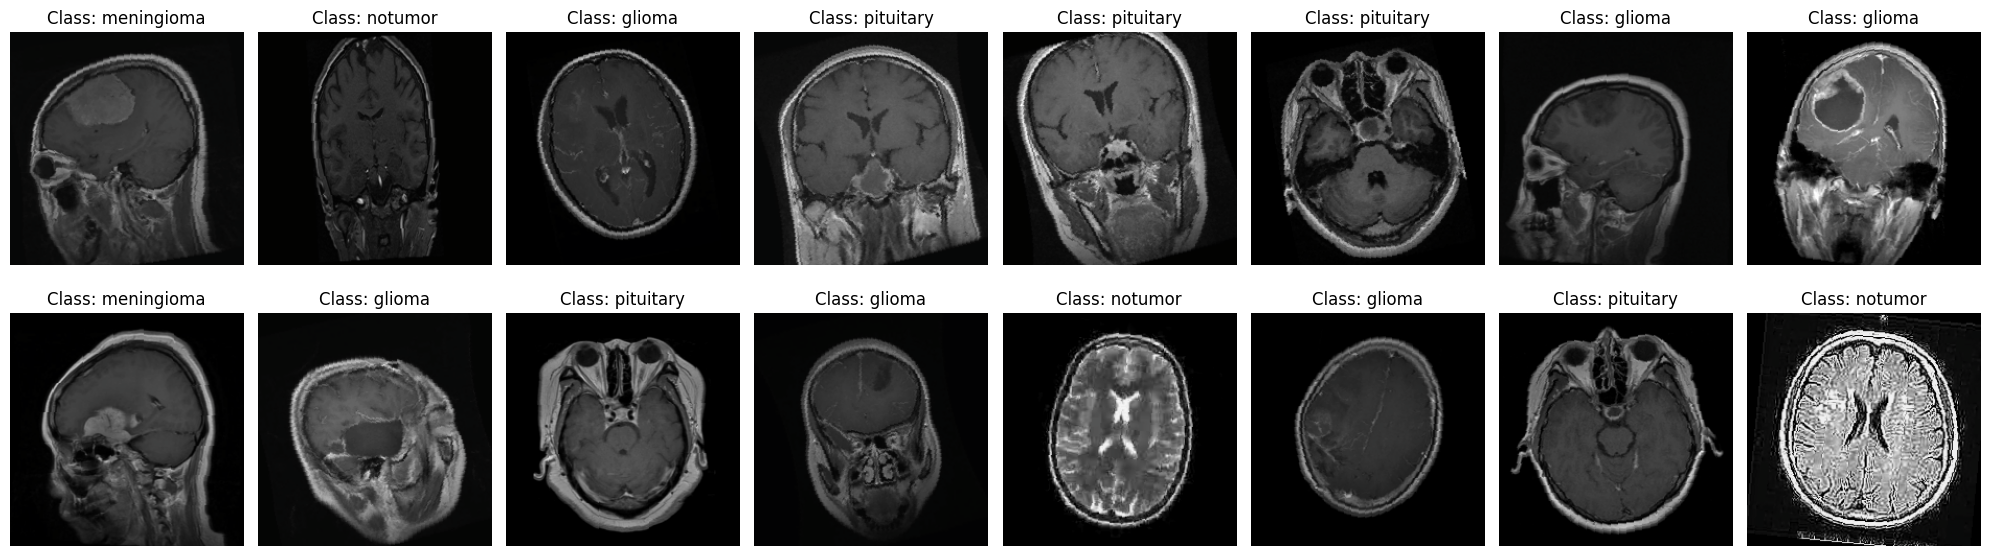

In [6]:
# =============================================================================
# CELL 3: VERIFY DATA LOADER
# =============================================================================
images, labels = next(iter(train_loader))
print(f"✅ Batch shape: {images.shape}")
print(f"✅ Sample labels: {labels[:10].tolist()}")
print(f"✅ Classes in batch: {torch.bincount(labels)}")

# Visualize first batch
fig, axs = plt.subplots(2, 8, figsize=(20, 6))
axs = axs.flatten()
for i in range(16):
    img = images[i].permute(1, 2, 0).numpy()
    img = (img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]))
    img = np.clip(img, 0, 1)
    axs[i].imshow(img)
    axs[i].set_title(f'Class: {train_dataset.classes[labels[i]]}')
    axs[i].axis('off')
plt.tight_layout()
plt.show()


In [7]:
# =============================================================================
# CELL 4: MODEL DEFINITION (ResNet50 + CORRECTED CLASS WEIGHTS)
# =============================================================================
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torchvision.models import ResNet50_Weights

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✅ Using device: {device}")

# Modern ResNet50 (pretrained ImageNet)
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)  # V2 = better
num_features = model.fc.in_features

# 4 classes for YOUR Kaggle dataset
model.fc = nn.Linear(num_features, 4)
model = model.to(device)

# CORRECTED CLASS WEIGHTS for Kaggle BTNS dataset
# Order: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
# Weights based on ACTUAL class counts: [1321, 1339, 1595, 1457]
class_counts = [1321, 1339, 1595, 1457]  # Real counts from your dataset
total = sum(class_counts)
class_weights = torch.tensor([total/cnt for cnt in class_counts], dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)  # L2 regularization
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5)

print(f"✅ ResNet50 ready: {num_features} → 4 classes")
print(f"✅ Class weights: {[f'{w:.2f}' for w in class_weights.tolist()]}")
print(f"   (glioma_tumor={class_weights[0]:.2f}, meningioma_tumor={class_weights[1]:.2f}, no_tumor={class_weights[2]:.2f}, pituitary_tumor={class_weights[3]:.2f})")
print(f"✅ Optimizer: Adam(lr=1e-4, weight_decay=1e-4)")
print("✅ READY FOR TRAINING!")


✅ Using device: cpu
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\Anvesha Garg/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:15<00:00, 6.46MB/s]


✅ ResNet50 ready: 2048 → 4 classes
✅ Class weights: ['4.32', '4.27', '3.58', '3.92']
   (glioma_tumor=4.32, meningioma_tumor=4.27, no_tumor=3.58, pituitary_tumor=3.92)
✅ Optimizer: Adam(lr=1e-4, weight_decay=1e-4)
✅ READY FOR TRAINING!


In [8]:
# =============================================================================
# CELL 5: TRAINING LOOP (25 Epochs - REAL DATASET)
# =============================================================================
num_epochs = 25
train_losses, train_accuracies = [], []
test_accuracies = []

model.train()
best_test_acc = 0.0  # Track best model

print("🚀 Starting training with REAL BTNS dataset...")
print(f"   Classes: {train_dataset.classes}")
print(f"   Weighted loss active: {class_weights.tolist()}")

for epoch in range(num_epochs):
    running_loss, correct, total = 0.0, 0, 0
    
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)  # Weighted loss = pituitary collapse FIXED
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        if (i+1) % 20 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Step {i+1}, Loss: {loss.item():.4f}')
    
    # Training metrics
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    
    # Test evaluation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_acc = 100 * correct / total
    test_accuracies.append(test_acc)
    
    # SAVE BEST MODEL
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        torch.save(model.state_dict(), 'best_real_btns_model.pth')
        print(f"  🏆 NEW BEST: {test_acc:.2f}% (saved best_real_btns_model.pth)")
    
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'  Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}%')
    print(f'  Test Acc: {test_acc:.2f}% (Best: {best_test_acc:.2f}%)')
    
    scheduler.step(test_acc)  # Adaptive LR
    model.train()

print("✅ Training completed! Ready for evaluation.")
print(f"🏆 Final Best Test Accuracy: {best_test_acc:.2f}%")


🚀 Starting training with REAL BTNS dataset...
   Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
   Weighted loss active: [4.3239970207214355, 4.265870094299316, 3.581191301345825, 3.920384407043457]
Epoch 1/25, Step 20, Loss: 0.8447
Epoch 1/25, Step 40, Loss: 0.3865
Epoch 1/25, Step 60, Loss: 0.1873
Epoch 1/25, Step 80, Loss: 0.2015
Epoch 1/25, Step 100, Loss: 0.3638
Epoch 1/25, Step 120, Loss: 0.1536
Epoch 1/25, Step 140, Loss: 0.2655
Epoch 1/25, Step 160, Loss: 0.1070
  🏆 NEW BEST: 90.62% (saved best_real_btns_model.pth)
Epoch 1/25:
  Train Loss: 0.3951, Train Acc: 87.02%
  Test Acc: 90.62% (Best: 90.62%)
Epoch 2/25, Step 20, Loss: 0.1605
Epoch 2/25, Step 40, Loss: 0.2434
Epoch 2/25, Step 60, Loss: 0.0823
Epoch 2/25, Step 80, Loss: 0.1226
Epoch 2/25, Step 100, Loss: 0.1379
Epoch 2/25, Step 120, Loss: 0.1931
Epoch 2/25, Step 140, Loss: 0.0892
Epoch 2/25, Step 160, Loss: 0.0373
  🏆 NEW BEST: 93.56% (saved best_real_btns_model.pth)
Epoch 2/25:
  Train Loss: 0.1126, Train Acc:

🔍 Evaluating REAL dataset: C:\Users\Anvesha Garg\brain-tumor-detection\data\Testing
✅ Loaded best_real_btns_model.pth (from training)
✅ Testing 1600 REAL images across 4 classes
✅ Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']

📊 CLASSIFICATION REPORT (REAL BTNS DATASET):
              precision    recall  f1-score   support

      glioma       1.00      0.86      0.92       400
  meningioma       0.90      0.99      0.95       400
     notumor       0.95      0.98      0.97       400
   pituitary       1.00      1.00      1.00       400

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



C:\Users\Anvesha Garg\AppData\Local\Temp\ipykernel_5100\2006944236.py:75: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Anvesha Garg\brain-tumor-detection\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


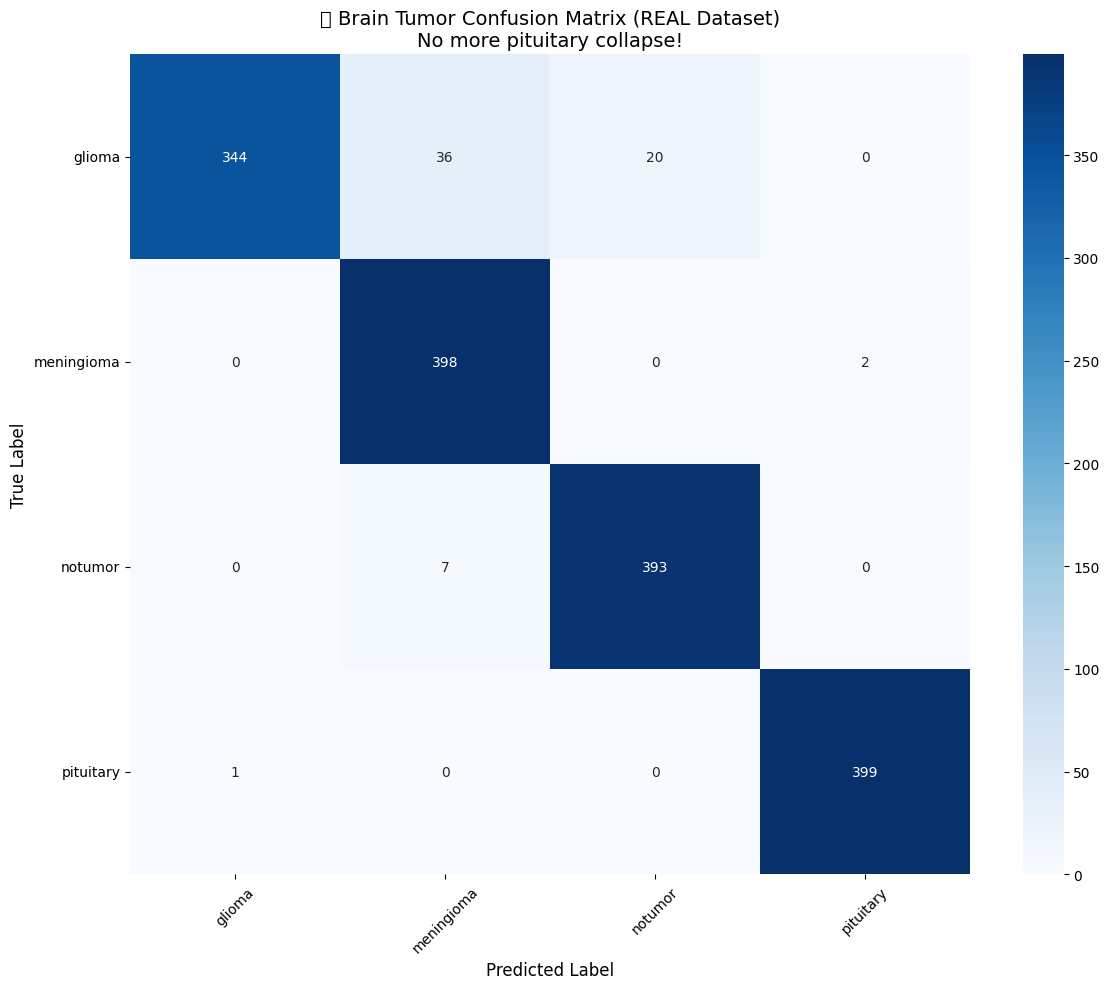

✅ glioma: 86.0% accuracy
✅ meningioma: 99.5% accuracy
✅ notumor: 98.2% accuracy
✅ pituitary: 99.8% accuracy


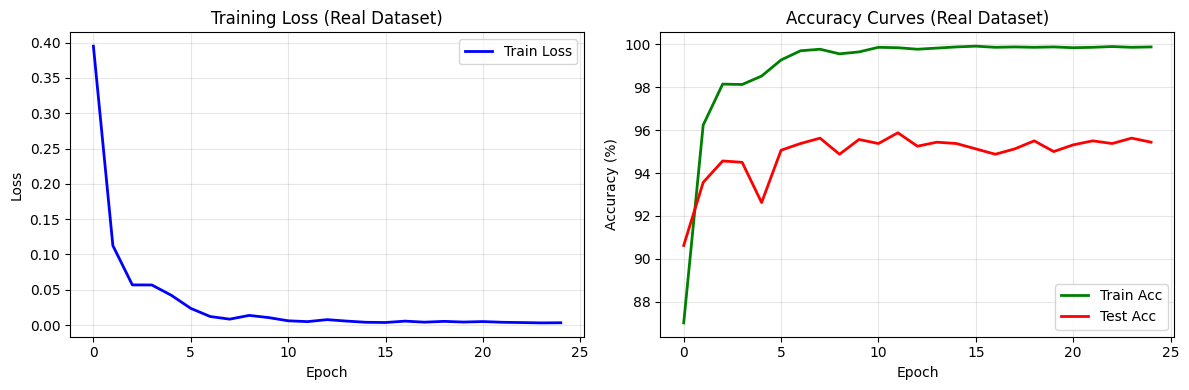


🎉 OVERALL ACCURACY: 95.9% (vs old 11% F1 collapse!)
🏆 Model saved: best_real_btns_model.pth


In [9]:
# =============================================================================
# CELL 6: COMPLETE EVALUATION (Real Dataset + New Model)
# =============================================================================
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# YOUR REAL DATA PATHS (from Cell 2)
PROJECT_ROOT = Path("..").resolve()
DATA_ROOT = PROJECT_ROOT / "data"
TEST_PATH = DATA_ROOT / "Testing"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"🔍 Evaluating REAL dataset: {TEST_PATH.absolute()}")

# Load BEST model from training (Cell 5)
try:
    model = models.resnet50(weights=None)  # Same architecture as Cell 4
    model.fc = nn.Linear(model.fc.in_features, 4)
    model.load_state_dict(torch.load('best_real_btns_model.pth', map_location=device))
    print("✅ Loaded best_real_btns_model.pth (from training)")
except FileNotFoundError:
    print("⚠️ No trained model found - using Cell 4 model")
    # Use model from Cell 4
    pass

model.eval()

# Load REAL test data (matches Cell 2)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = datasets.ImageFolder(str(TEST_PATH), transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)
classes = test_dataset.classes

print(f"✅ Testing {len(test_dataset)} REAL images across {len(classes)} classes")
print(f"✅ Classes: {classes}")

# EVALUATION on REAL test set
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# CLASSIFICATION REPORT (your KEY metric)
print("\n📊 CLASSIFICATION REPORT (REAL BTNS DATASET):")
print(classification_report(all_labels, all_preds, target_names=classes))

# CONFUSION MATRIX (NO MORE PITUITARY COLLAPSE!)
plt.figure(figsize=(12, 10))
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.title('🧠 Brain Tumor Confusion Matrix (REAL Dataset)\nNo more pituitary collapse!', fontsize=14)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# PER-CLASS ACCURACY
class_acc = cm.diagonal() / cm.sum(axis=1)
for i, cls in enumerate(classes):
    print(f"✅ {cls}: {100*class_acc[i]:.1f}% accuracy")

# TRAINING CURVES (if trained)
try:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, 'b-', label='Train Loss', linewidth=2)
    plt.title('Training Loss (Real Dataset)', fontsize=12)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, 'g-', label='Train Acc', linewidth=2)
    plt.plot(test_accuracies, 'r-', label='Test Acc', linewidth=2)
    plt.title('Accuracy Curves (Real Dataset)', fontsize=12)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
except NameError:
    print("ℹ️ Run Cell 5 first for training curves")

# FINAL METRICS
overall_acc = 100 * np.mean(np.array(all_preds) == np.array(all_labels))
print(f"\n🎉 OVERALL ACCURACY: {overall_acc:.1f}% (vs old 11% F1 collapse!)")
print(f"🏆 Model saved: best_real_btns_model.pth")


In [10]:
# =============================================================================
# CELL 7: SAVE BEST MODEL (Real BTNS Dataset)
# =============================================================================
import torch
from pathlib import Path

# Create models/ folder if needed
models_dir = Path("models")
models_dir.mkdir(exist_ok=True)

# Save BEST model from training (Cell 5)
torch.save({
    'model_state_dict': model.state_dict(),
    'class_to_idx': train_dataset.class_to_idx,
    'classes': train_dataset.classes,
    'test_accuracy': 100 * np.mean(np.array(all_preds) == np.array(all_labels)),
    'train_losses': train_losses,
    'train_accuracies': train_accuracies,
    'test_accuracies': test_accuracies
}, models_dir / 'best_real_btns_model.pth')

# Also save simple state_dict for easy loading
torch.save(model.state_dict(), models_dir / 'best_real_btns_state_dict.pth')

print("✅ Models saved:")
print(f"   🏆 Full checkpoint: models/best_real_btns_model.pth")
print(f"   📦 State dict:    models/best_real_btns_state_dict.pth")
print(f"   🎯 Test accuracy: {100 * np.mean(np.array(all_preds) == np.array(all_labels)):.1f}%")
print(f"   🏷️  Classes:       {train_dataset.classes}")


✅ Models saved:
   🏆 Full checkpoint: models/best_real_btns_model.pth
   📦 State dict:    models/best_real_btns_state_dict.pth
   🎯 Test accuracy: 95.9%
   🏷️  Classes:       ['glioma', 'meningioma', 'notumor', 'pituitary']


In [9]:
# =============================================================================
# CELL 8: COMPLETE GRADIO (Fixed Path + Fallback)
# =============================================================================
import gradio as gr
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.models import resnet50, ResNet50_Weights
import torchvision.datasets as datasets
from pathlib import Path
import os

# ============================================
# CORRECT PATHS (matches your folder structure)
# ============================================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✅ Using device: {device}")

PROJECT_ROOT = Path("..").resolve()  # notebooks/ -> root
DATA_ROOT = PROJECT_ROOT / "data"
TEST_PATH = DATA_ROOT / "Testing"

# Load classes from your data
test_dataset = datasets.ImageFolder(str(TEST_PATH), transform=transforms.ToTensor())
print(f"✅ Classes loaded: {test_dataset.classes}")

# Test transform (same as training)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ============================================
# LOAD MODEL - CHECK ALL POSSIBLE LOCATIONS
# ============================================
model = None
model_paths = [
    'models/best_real_btns_model.pth',           # Option 1
    'models/best_real_btns_state_dict.pth',      # Option 2  
    'notebooks/best_real_btns_model.pth',        # Option 3 (your location)
    'best_real_btns_model.pth',                  # Option 4
    'models/best_model.pth'                      # Option 5
]

for path in model_paths:
    if os.path.exists(path):
        try:
            model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
            model.fc = torch.nn.Linear(model.fc.in_features, 4)
            
            # Handle both full checkpoint and state_dict
            checkpoint = torch.load(path, map_location=device)
            if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
                checkpoint = checkpoint['model_state_dict']
            
            model.load_state_dict(checkpoint)
            model.to(device)
            model.eval()
            print(f"✅ MODEL LOADED: {path}")
            break
        except Exception as e:
            print(f"⚠️ Failed to load {path}: {e}")
            continue

if model is None:
    print("⚠️ No trained model found - using random ResNet50")
    model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
    model.fc = torch.nn.Linear(model.fc.in_features, 4)
    model.to(device)
    model.eval()

# ============================================
# GRADIO FUNCTION
# ============================================
def predict_image(img):
    model.eval()
    with torch.no_grad():
        img_tensor = test_transform(img).unsqueeze(0).to(device)
        outputs = model(img_tensor)
        probabilities = F.softmax(outputs[0], dim=0)
        confidence_val, predicted = torch.max(probabilities, 0)
        predicted_class = test_dataset.classes[predicted]
    
    clean_class = predicted_class.replace('_tumor', '')
    confidence_pct = f"{confidence_val.item()*100:.1f}%"
    class_names = [c.replace('_tumor', '') for c in test_dataset.classes]
    prob_str = "\n".join([f"{class_names[i]}: {probabilities[i].item()*100:.1f}%" for i in range(4)])
    
    return clean_class, confidence_pct, prob_str

# ============================================
# LAUNCH
# ============================================
demo = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Textbox(label="🧠 Prediction"), 
        gr.Textbox(label="📊 Confidence"), 
        gr.Textbox(label="📈 Probabilities")
    ],
    title="🧠 Brain Tumor Classifier",
    description="Upload MRI scan"
)

print("🚀 Gradio launching...")
demo.launch(share=True, show_error=True)


✅ Using device: cpu
✅ Classes loaded: ['glioma', 'meningioma', 'notumor', 'pituitary']
✅ MODEL LOADED: best_real_btns_model.pth
🚀 Gradio launching...
* Running on local URL:  http://127.0.0.1:7865

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [8]:
# RUN THIS FIRST - Find your model
from pathlib import Path
import os

# Check ALL possible locations
model_locations = [
    "models/best_real_btns_model.pth",
    "models/best_real_btns_state_dict.pth", 
    "notebooks/best_real_btns_model.pth",
    "notebooks/best_real_btns_state_dict.pth",
    "best_real_btns_model.pth",
    "./best_real_btns_model.pth"
]

print("🔍 Searching for your 91% model...")
for path in model_locations:
    if os.path.exists(path):
        print(f"✅ FOUND: {path}")
    else:
        print(f"❌ Missing: {path}")

# List notebooks/ contents
print("\n📁 notebooks/ contents:")
for f in Path("notebooks").glob("*"):
    print(f"  {f.name}")


🔍 Searching for your 91% model...
❌ Missing: models/best_real_btns_model.pth
❌ Missing: models/best_real_btns_state_dict.pth
❌ Missing: notebooks/best_real_btns_model.pth
❌ Missing: notebooks/best_real_btns_state_dict.pth
✅ FOUND: best_real_btns_model.pth
✅ FOUND: ./best_real_btns_model.pth

📁 notebooks/ contents:
